In [2]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_array=cv2.imread("train/0/0.jpg")

In [4]:
img_array.shape
print(img_array)

[[[ 72  72  72]
  [ 78  78  78]
  [ 81  81  81]
  ...
  [ 52  52  52]
  [ 43  43  43]
  [ 40  40  40]]

 [[ 65  65  65]
  [ 62  62  62]
  [ 59  59  59]
  ...
  [ 55  55  55]
  [ 52  52  52]
  [ 45  45  45]]

 [[ 47  47  47]
  [ 42  42  42]
  [ 60  60  60]
  ...
  [ 47  47  47]
  [ 54  54  54]
  [ 49  49  49]]

 ...

 [[ 91  91  91]
  [ 65  65  65]
  [ 46  46  46]
  ...
  [ 74  74  74]
  [ 54  54  54]
  [ 43  43  43]]

 [[ 76  76  76]
  [ 80  80  80]
  [ 76  76  76]
  ...
  [108 108 108]
  [ 69  69  69]
  [ 46  46  46]]

 [[ 77  77  77]
  [ 74  74  74]
  [ 81  81  81]
  ...
  [105 105 105]
  [108 108 108]
  [ 82  82  82]]]


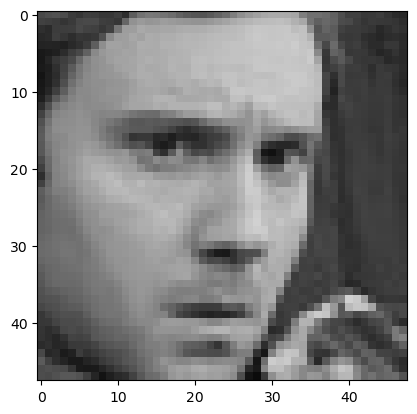

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory="train/"

In [7]:
classes=["0","1","2","3","4","5","6"]

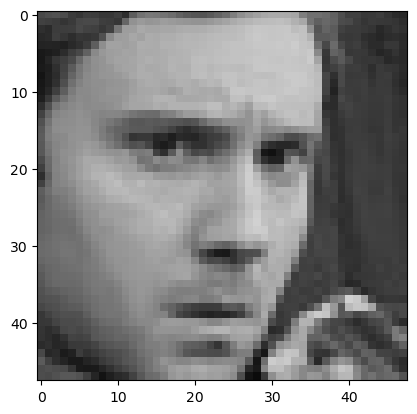

In [8]:
for category in classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break 

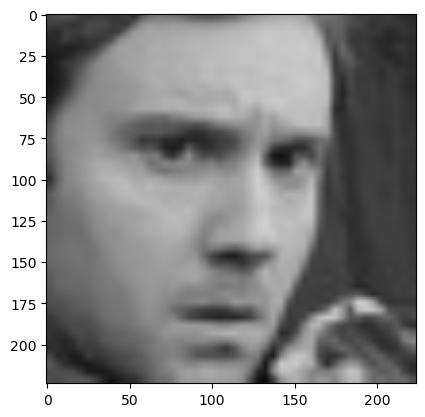

In [9]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()    

In [10]:
new_array.shape

(224, 224, 3)

In [11]:
training_data=[]
def create_training_Data():
    for category in classes:
        path = os.path.join(Datadirectory,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [12]:
create_training_Data()

In [13]:
print(len(training_data))

1942


In [14]:
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,3)  

In [15]:
x.shape

(1942, 224, 224, 3)

In [16]:
x=x/5.0;
y[0]

0

In [17]:
y=np.array(y)

In [18]:
y.shape

(1942,)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = keras.Sequential()

In [38]:
sequence_length = 10  
feature_dim = 48* 48

In [39]:
model.add(layers.LSTM(128, input_shape=(sequence_length, feature_dim), return_sequences=True))
model.add(layers.LSTM(128, return_sequences=True))

ValueError: Input 0 of layer "lstm_7" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 7)

In [ ]:
model.add(layers.Flatten())

In [ ]:
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
classes= keras.utils.to_categorical(classes, 7)

In [ ]:
history=model.fit(x,y,epochs=15)